<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# GARCH Lab

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Load the data and log-transform `tb1`

In [2]:
from statsmodels.datasets import get_rdataset

In [3]:
data = get_rdataset('Mishkin', package='Ecdat')
df = data.data
df['log_tb1'] = np.log(df['tb1'])
df.head()

,pai1,pai3,tb1,tb3,cpi,log_tb1
0,-3.552289,1.129370,1.100854,1.129406,23.5,0.096086
1,5.247540,4.001566,1.125513,1.137254,23.6,0.118239
2,1.692860,4.492160,1.115715,1.142319,23.6,0.109495
3,5.064298,7.817513,1.146380,1.177902,23.7,0.136609
4,6.719322,9.433580,1.158520,1.167777,23.8,0.147143


In [ ]:
# comsumer price index = cpi 
# 

### Visualize the time series. Would differencing be useful?

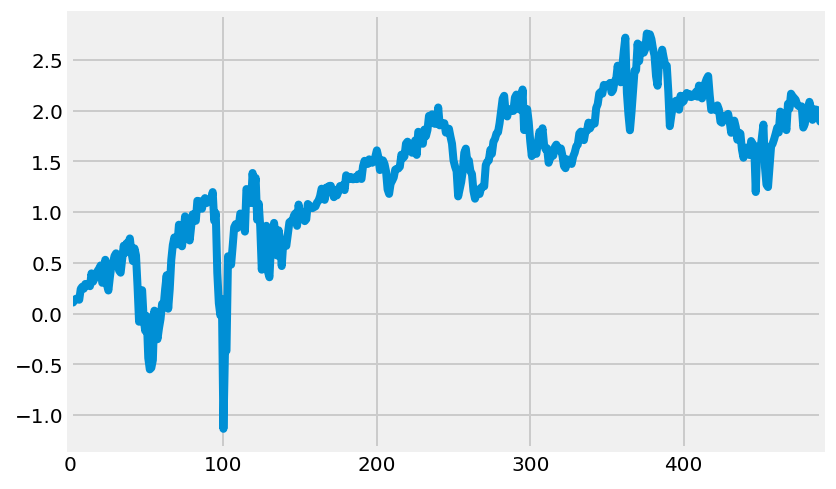

In [4]:
df.log_tb1.plot()

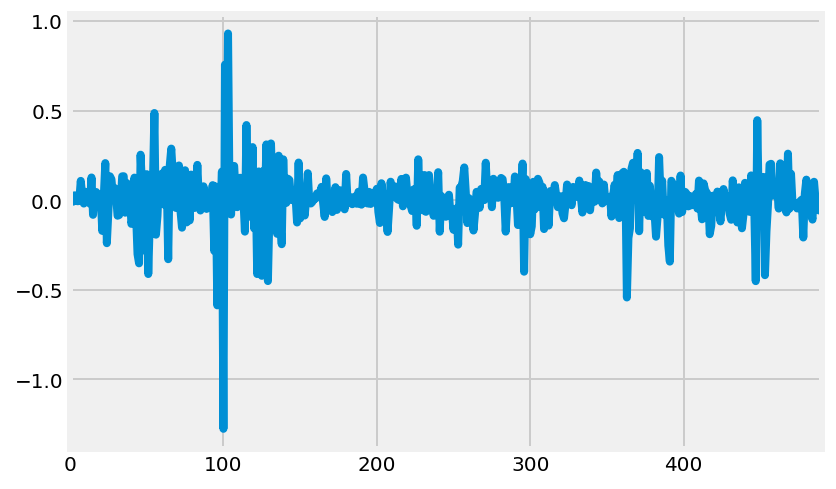

In [6]:
df['log_tb1_diff'] = df.log_tb1.diff()
df.log_tb1_diff.plot()

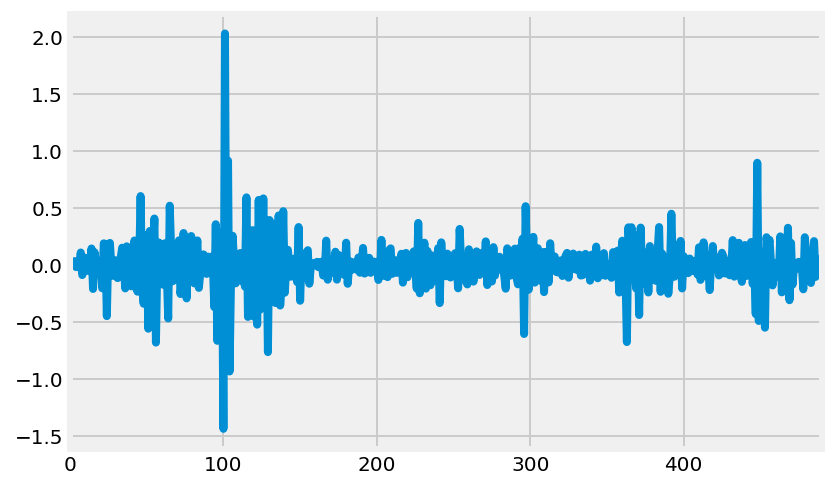

In [7]:
df['log_tb1_diff2'] = df.log_tb1.diff().diff()
df.log_tb1_diff2.plot()

In [8]:
df.head()

,pai1,pai3,tb1,tb3,cpi,log_tb1,log_tb1_diff,log_tb1_diff2
0,-3.552289,1.129370,1.100854,1.129406,23.5,0.096086,NaN,NaN
1,5.247540,4.001566,1.125513,1.137254,23.6,0.118239,0.022153,NaN
2,1.692860,4.492160,1.115715,1.142319,23.6,0.109495,-0.008743,-0.030896
3,5.064298,7.817513,1.146380,1.177902,23.7,0.136609,0.027114,0.035857
4,6.719322,9.433580,1.158520,1.167777,23.8,0.147143,0.010534,-0.016580


### Fit a GARCH model

In [11]:
from arch import arch_model

In [9]:
data = df.log_tb1_diff[1:]

In [30]:
am = arch_model(data, mean='AR', lags=3, vol='GARCH', p=3, q=3)
res = am.fit(update_freq=7)
res.summary()


Iteration:      7,   Func. Count:    103,   Neg. LLF: -344.9169858100152
Iteration:     14,   Func. Count:    202,   Neg. LLF: -350.32061357838813
Iteration:     21,   Func. Count:    295,   Neg. LLF: -350.976890206463
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -350.97689456196537
            Iterations: 22
            Function evaluations: 309
            Gradient evaluations: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:           log_tb1_diff   R-squared:                       0.013
Mean Model:                        AR   Adj. R-squared:                  0.007
Vol Model:                      GARCH   Log-Likelihood:                350.977
Distribution:                  Normal   AIC:                          -679.954
Method:            Maximum Likelihood   BIC:                          -633.883
                                        No. Observations:                  487
Date:                Tue, Aug 20 2019   Df Residuals:                      476
Time:                        11:50:16   Df Model:                           11
                                   Mean Model                                   
================================================================================
                    coef    std err          t      P>|t|       95.0% Conf. Int.
--------------------------------------------------------------------------------
Const         8.0318e-03  5.479e-03      1.466      0.143 [-2.706e-03,1.877e-02]
log_...iff[1]    -0.1605  6.441e-02     -2.491  1.273e-02   [ -0.287,-3.423e-02]
log_...iff[2]    -0.1137  5.654e-02     -2.011  4.428e-02   [ -0.225,-2.909e-03]
log_...iff[3]     0.0187  6.449e-02      0.291      0.771      [ -0.108,  0.145]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.6306e-03  1.757e-03      1.497      0.134 [-8.136e-04,6.075e-03]
alpha[1]       0.2713      0.107      2.529  1.145e-02    [6.101e-02,  0.482]
alpha[2]       0.0492      0.181      0.272      0.786      [ -0.305,  0.404]
alpha[3]       0.2122      0.401      0.529      0.597      [ -0.574,  0.999]
beta[1]        0.4015      0.368      1.091      0.275      [ -0.319,  1.122]
beta[2]    7.8638e-11      0.718  1.096e-10      1.000      [ -1.407,  1.407]
beta[3]        0.0000      0.538      0.000      1.000      [ -1.054,  1.054]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
# WHEN CHRISTOPH DID THE PURE AR MODEL,HIS USED VOL = "CONSTANT"
# by the way, VOL means volatility.


### Obtain the model score

In [13]:
res.rsquared

0.012898508411460785

### Look at the distribution of the residuals

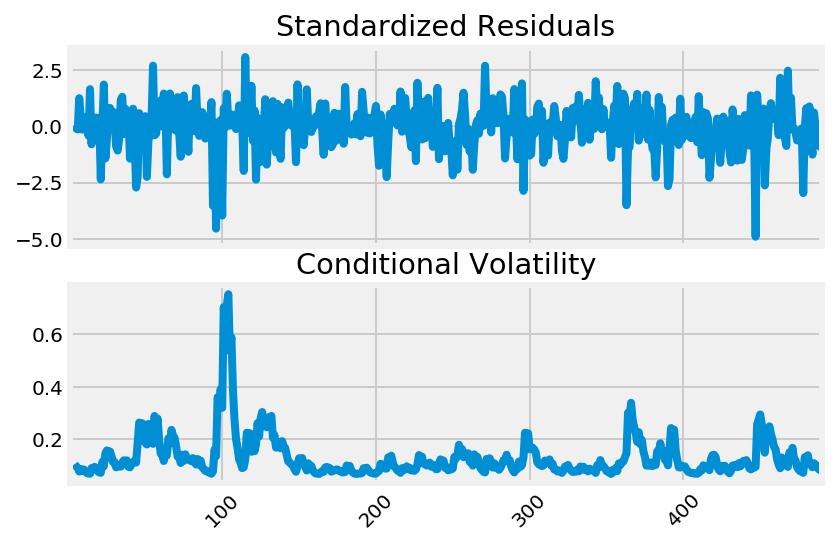

In [19]:
ax = res.plot()
ax.axes[1].tick_params( axis='x', labelrotation=45)
plt.show()

### Obtain the model forecasts and plot

In [22]:
start = 2
forecasts = res.forecast(horizon=5, start=start, align='target')
forecasts.mean[:15]


,h.1,h.2,h.3,h.4,h.5
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,0.005091,NaN,NaN,NaN,NaN
5,0.003094,0.003967,NaN,NaN,NaN
6,0.008372,0.006845,0.007324,NaN,NaN
7,0.009608,0.007616,0.006779,0.006501,NaN
8,-0.008882,0.006829,0.005737,0.006223,0.006230
9,-0.007610,-0.002847,0.005767,0.006402,0.006390
10,0.010760,0.008902,0.011514,0.006510,0.006495


In [24]:
from sklearn.metrics import mean_squared_error,r2_score



In [25]:
[(i, mean_squared_error(data[start+i:],
                        forecasts.mean[f'h.{i}'].dropna())**0.5) for i in range(1, 6)]


[(1, 0.14844568780762493),
 (2, 0.15101592372396982),
 (3, 0.1503949037165117),
 (4, 0.14989581245492162),
 (5, 0.14996499726089665)]

In [26]:
[(i, r2_score(data[start+i:], forecasts.mean[f'h.{i}'].dropna())) for i in range(
    1, 6)]


[(1, 0.012898508411461118),
 (2, -0.019486134036522218),
 (3, -0.009047477821975791),
 (4, -0.0003002148403457028),
 (5, -0.00014918472421721063)]

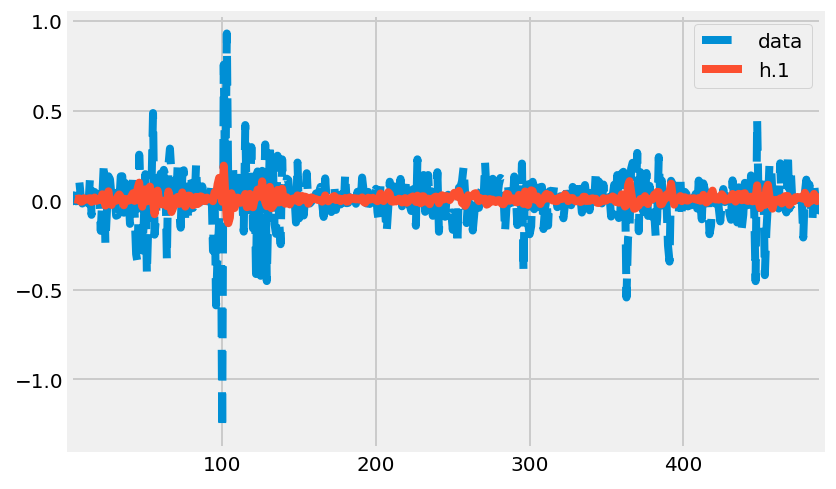

In [27]:
fig, ax = plt.subplots()
data.plot(ax=ax, label='data', ls='--')
forecasts.mean[['h.1']].plot(ax=ax)
ax.legend()
plt.show()


### Produce a hedgehog plot for the predicted means and volatilities

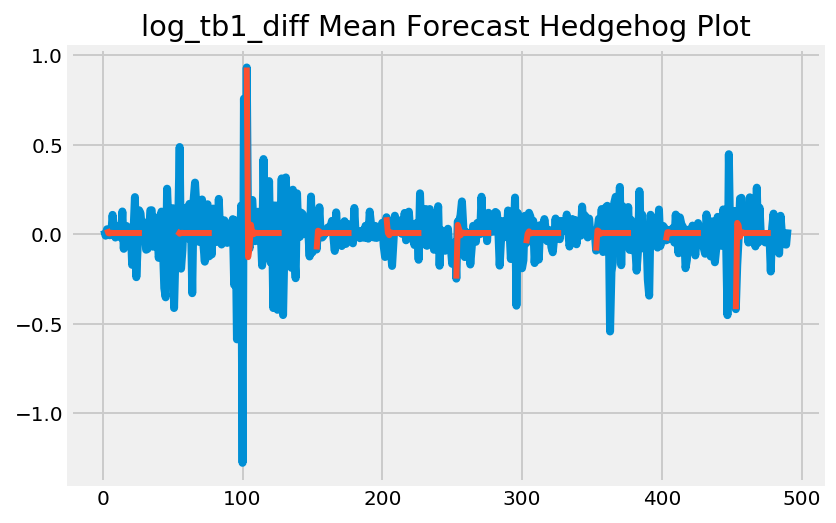

In [28]:
res.hedgehog_plot(horizon=25, step=50, type='mean')
plt.show()


### Choose variables from the data frame to be regressed on each other. Fit an ARX or GARCH  model taking exogenous variables into account and analyse your model in the same way as above.

In [31]:
from arch.univariate import ARX

In [35]:
ar = ARX(data, lags=[1,3], constant=True)
res = ar.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                     AR - Constant Variance Model Results                     
==============================================================================
Dep. Variable:           log_tb1_diff   R-squared:                       0.033
Mean Model:                        AR   Adj. R-squared:                  0.029
Vol Model:          Constant Variance   Log-Likelihood:                242.911
Distribution:                  Normal   AIC:                          -477.822
Method:            Maximum Likelihood   BIC:                          -461.069
                                        No. Observations:                  487
Date:                Tue, Aug 20 2019   Df Residuals:                      483
Time:                        11:51:48   Df Model:                            4
                                   Mean Model                                   
================================================================================
                    coef    std err          t      P>|t|       95.0% Conf. Int.
--------------------------------------------------------------------------------
Const         4.5427e-03  6.867e-03      0.661      0.508 [-8.917e-03,1.800e-02]
log_...iff[1]    -0.1653  8.422e-02     -1.963  4.964e-02   [ -0.330,-2.617e-04]
log_...iff[3]    -0.0714      0.116     -0.615      0.538      [ -0.299,  0.156]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
sigma2         0.0216  3.988e-03      5.414  6.167e-08 [1.377e-02,2.941e-02]
============================================================================

Covariance estimator: White's Heteroskedasticity Consistent Estimator
"""

In [36]:
[(i, mean_squared_error(data[start+i:],
                        forecasts.mean[f'h.{i}'].dropna())**0.5) for i in range(1, 6)]


[(1, 0.14844568780762493),
 (2, 0.15101592372396982),
 (3, 0.1503949037165117),
 (4, 0.14989581245492162),
 (5, 0.14996499726089665)]

In [37]:
[(i, r2_score(data[start+i:], forecasts.mean[f'h.{i}'].dropna())) for i in range(
    1, 6)]


[(1, 0.012898508411461118),
 (2, -0.019486134036522218),
 (3, -0.009047477821975791),
 (4, -0.0003002148403457028),
 (5, -0.00014918472421721063)]

In [38]:
start = 2
forecasts = res.forecast(horizon=5, start=start, align='target')
forecasts.mean[:15]


,h.1,h.2,h.3,h.4,h.5
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,-0.001522,NaN,NaN,NaN,NaN
5,0.003425,0.005419,NaN,NaN,NaN
6,0.003668,0.002040,0.001710,NaN,NaN
7,0.004459,0.003184,0.003453,0.004369,NaN
8,-0.012775,0.004264,0.004475,0.003727,0.003433
9,0.001392,0.006944,0.004126,0.003541,0.003781
10,0.000036,-0.003366,-0.004284,0.003542,0.003730


In [39]:
[(i, r2_score(data[start+i:], forecasts.mean[f'h.{i}'].dropna())) for i in range(
    1, 6)]

[(1, 0.03281753219653594),
 (2, 0.006699371154235689),
 (3, 0.007301354344111166),
 (4, 0.0034784863630106244),
 (5, 0.0002451513031291874)]